In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [5]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
synthetic_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

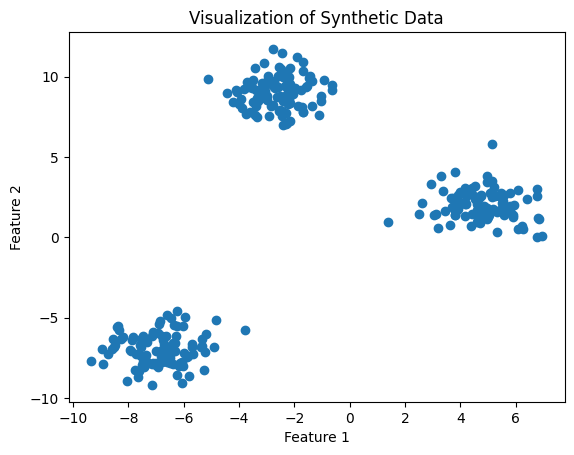

In [6]:
plt.scatter(synthetic_df['Feature 1'], synthetic_df['Feature 2'])
plt.title('Visualization of Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
Kmeans_synthetic = KMeans(n_clusters=3, random_state=42)
synthetic_df['Cluster'] = Kmeans_synthetic.fit_predict(synthetic_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


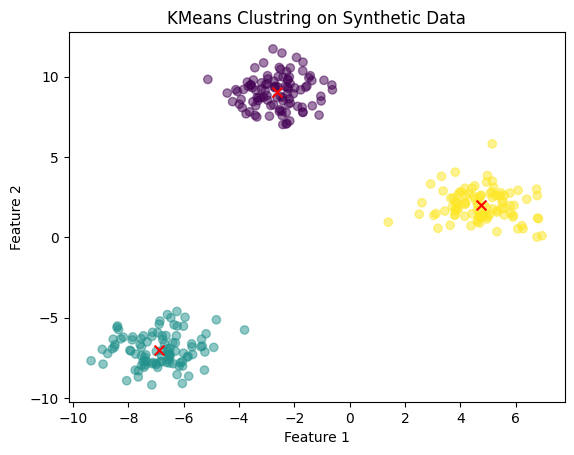

In [8]:
plt.scatter(synthetic_df['Feature 1'], synthetic_df['Feature 2'], c=synthetic_df['Cluster'], cmap='viridis', alpha=0.5)
centriods = Kmeans_synthetic.cluster_centers_
plt.scatter(centriods[:, 0], centriods[:, 1], c='red', s=50, marker='x') # Marker centirods
plt.title('KMeans Clustring on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [10]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


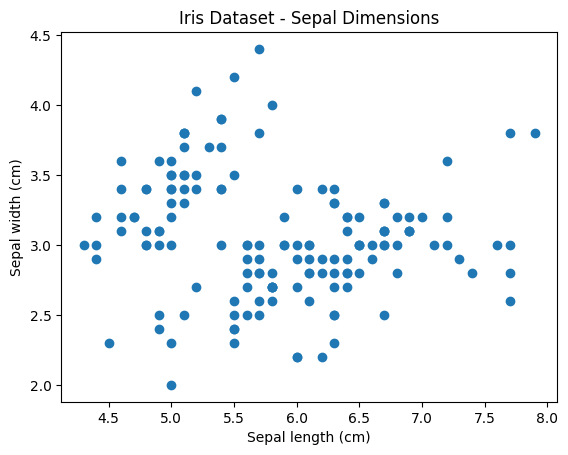

In [11]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.title('Iris Dataset - Sepal Dimensions')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['sepal length (cm)', 'sepal width (cm)']])


In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters # Add cluster information to the DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


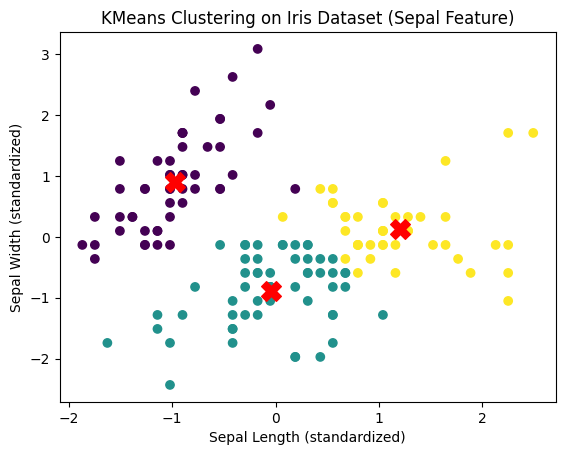

In [14]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster'], cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200,
color='red', marker='X') # Mark the centriods
plt.title('KMeans Clustering on Iris Dataset (Sepal Feature)')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()

Text(0.5, 0, 'Sepal Length (cm)')

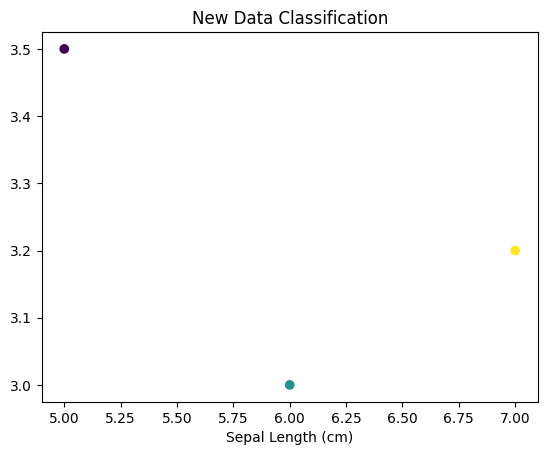

In [19]:
new_data = pd.DataFrame([[5.0, 3.5], [6.0, 3.0], [7.0, 3.2]], columns=['sepal length (cm)', 'sepal width (cm)'])
new_data_scaled = scaler.transform(new_data)
new_data['Cluster'] = kmeans.predict(new_data_scaled)
plt.scatter(new_data['sepal length (cm)'], new_data['sepal width (cm)'], c=new_data['Cluster'], cmap='viridis')
plt.title('New Data Classification')
plt.xlabel('Sepal Length (cm)')